In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

In [2]:
def linear_kernel(x1,x2):
        return np.dot(x1,x2)
    
def gaussian_kernel(x1,x2,sigma=1):
    return np.exp((-np.linalg.norm(x1-x2)**2)/2*sigma**2)


class SupportVectorMachine:
    
    def __init__(self, kernel=linear_kernel,C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: 
            self.C = float(self.C)
            
    def train(self,data,T):
        self.data=data
        self.T=T
        n=len(self.data)
        
        P=matrix([[self.T[i]*self.T[j]*self.kernel(self.data[i], self.data[j]) 
                   for i in range(n)]for j in range(n)]) 
        q=matrix(-np.ones(n))
        A =matrix(T, (1,n),tc='d')
        b=matrix(0.0)
        if self.C is None:
            h=matrix(np.zeros(n))
            G=matrix(-np.eye(n,n))
        else:
            G = matrix(np.vstack((-np.eye(n,n), np.eye(n,n))))
            h = matrix(np.hstack((np.zeros(n),self.C*np.ones(n))))
        
        sol=solvers.qp(P, q, G, h, A, b)
        a=np.array(sol['x'])
        
        sv = a>1e-5
        self.sv_a = a[sv]        
        self.sv_data = np.array([self.data[i,:] for i in range(n) if a[i]>1e-5])
        self.sv_T=np.array([T[i] for i in range(n) if a[i]>1e-5])
        
        self.b=sum([self.sv_T[n] -sum([self.sv_a[m]*self.sv_T[m]*self.kernel(self.sv_data[n],self.sv_data[m]) 
                                       for m in range(len(self.sv_a))]) for n in range(len(self.sv_a))])/len(self.sv_a)
        
       
    def predict(self, X_test:np.array):
        if X_test.size == len(X_test): 
            self.y = sum([self.sv_a[i]*self.sv_T[i]*self.kernel(self.sv_data[i],X_test) 
                          for i in range(len(self.sv_a))])+self.b 
        else:
            self.y = [sum([self.sv_a[i]*self.sv_T[i]*self.kernel(self.sv_data[i],datum) 
                           for i in range(len(self.sv_a))])+self.b for datum in X_test]
            
        return np.sign(self.y)
    
    def visualisation(self):
        self.w = np.dot(self.sv_a*self.sv_T,self.sv_data)
        plt.scatter(self.data[:,0], self.data[:,1],c=self.T)
        plt.scatter(self.sv_data[:,0],self.sv_data[:,1], c='red')
        plt.plot(data[:,0],(-self.b-self.w[1]*data[:,0])/self.w[0] )
        plt.show()

In [3]:
x1 = np.array(list(zip(np.random.normal(0,2,  size=500),
                       np.random.normal(0, 2,  size=500))))
x2 = np.array(list(zip(np.random.normal(9,2,  size=500),
                       np.random.normal(9, 2,  size=500))))

T = np.hstack((-np.ones(500), np.ones(500)))

data = np.vstack((x1, x2))

mask = np.arange(len(data))

np.random.shuffle(mask)

T = np.array(T[mask])
data = np.array(data[mask])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, T, test_size=0.33,
                                                    random_state=42)

In [6]:
sv = SupportVectorMachine()

In [7]:
sv.train(X_train,y_train)

     pcost       dcost       gap    pres   dres
 0: -6.0268e+01 -1.1930e+02  3e+03  5e+01  2e+00
 1: -8.7629e+01 -8.4925e+01  1e+03  3e+01  1e+00
 2: -1.3853e+02 -1.3285e+02  1e+03  3e+01  1e+00
 3: -3.0332e+02 -2.6161e+02  1e+03  2e+01  9e-01
 4: -2.0356e+03 -1.5041e+03  1e+03  2e+01  7e-01
 5: -9.5776e+02 -5.2987e+02  2e+03  1e+01  6e-01
 6: -5.5856e+02 -1.0570e+02  8e+02  5e+00  2e-01
 7: -7.6289e+00 -1.8940e+00  4e+01  1e-01  5e-03
 8: -6.8878e-01 -1.6804e+00  1e+00  5e-15  2e-13
 9: -1.3635e+00 -1.4106e+00  5e-02  2e-15  7e-14
10: -1.4048e+00 -1.4053e+00  5e-04  4e-15  7e-14
11: -1.4052e+00 -1.4052e+00  5e-06  5e-15  7e-14
12: -1.4052e+00 -1.4052e+00  5e-08  1e-15  8e-14
Optimal solution found.


In [8]:
sv.predict(X_test);

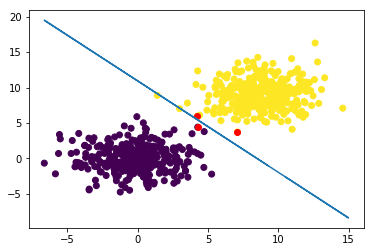

In [9]:
sv.visualisation()

In [10]:
x1 = np.array(list(zip(np.random.normal(0,3,  size=500),
                       np.random.normal(0, 3,  size=500))))
x2 = np.array(list(zip(np.random.normal(9,3,  size=500),
                       np.random.normal(9, 3,  size=500))))

T = np.hstack((-np.ones(500), np.ones(500)))

data = np.vstack((x1, x2))

mask = np.arange(len(data))

np.random.shuffle(mask)

T = np.array(T[mask])
data = np.array(data[mask])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, T, test_size=0.33,
                                                    random_state=42)

In [12]:
svc = SupportVectorMachine(C=1)
svc_sklearn = SVC(C=1,kernel='linear')

In [13]:
svc.train(X_train,y_train)
svc_sklearn.fit(X_train,y_train)

     pcost       dcost       gap    pres   dres
 0: -1.1627e+02 -1.4455e+03  8e+03  3e+00  4e-13
 1: -7.0873e+01 -8.1971e+02  1e+03  3e-01  3e-13
 2: -3.8477e+01 -1.6570e+02  2e+02  6e-02  2e-13
 3: -2.4909e+01 -5.1537e+01  5e+01  1e-02  1e-13
 4: -2.2378e+01 -4.1281e+01  4e+01  9e-03  1e-13
 5: -2.0900e+01 -3.4775e+01  3e+01  6e-03  1e-13
 6: -1.9661e+01 -3.1991e+01  3e+01  5e-03  1e-13
 7: -1.8252e+01 -2.9733e+01  2e+01  4e-03  1e-13
 8: -1.6610e+01 -2.5676e+01  2e+01  3e-03  1e-13
 9: -1.5322e+01 -2.0947e+01  1e+01  1e-03  1e-13
10: -1.4851e+01 -1.8180e+01  6e+00  7e-04  1e-13
11: -1.4686e+01 -1.5176e+01  7e-01  7e-05  1e-13
12: -1.4742e+01 -1.4824e+01  1e-01  9e-06  1e-13
13: -1.4760e+01 -1.4762e+01  3e-03  2e-07  1e-13
14: -1.4760e+01 -1.4760e+01  3e-05  2e-09  1e-13
15: -1.4760e+01 -1.4760e+01  3e-07  2e-11  1e-13
Optimal solution found.


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
sum(svc.predict(X_test)!=svc_sklearn.predict(X_test))

0

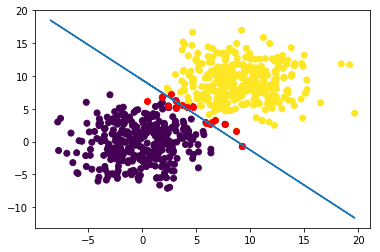

In [15]:
svc.visualisation()

In [16]:
from sklearn import datasets

In [17]:
data, T = datasets.make_circles(n_samples=1000, noise=0.03)
T[T==0]=-1

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, T, test_size=0.33,
                                                    random_state=42)

In [19]:
svg = SupportVectorMachine(kernel=gaussian_kernel,C=1)
svg_sklearn = SVC()

In [20]:
svg.train(X_train,y_train)
svg_sklearn.fit(X_train,y_train)

     pcost       dcost       gap    pres   dres
 0: -1.3328e+02 -1.2024e+03  4e+03  2e+00  4e-15
 1: -1.1701e+02 -6.5754e+02  5e+02  9e-15  5e-15
 2: -1.4366e+02 -2.1980e+02  8e+01  2e-14  4e-15
 3: -1.6920e+02 -1.9030e+02  2e+01  2e-15  4e-15
 4: -1.7557e+02 -1.8431e+02  9e+00  4e-15  4e-15
 5: -1.7774e+02 -1.8224e+02  5e+00  5e-15  4e-15
 6: -1.7929e+02 -1.8063e+02  1e+00  2e-15  4e-15
 7: -1.7977e+02 -1.8013e+02  4e-01  9e-15  5e-15
 8: -1.7993e+02 -1.7997e+02  4e-02  7e-15  5e-15
 9: -1.7994e+02 -1.7996e+02  2e-02  9e-15  4e-15
10: -1.7995e+02 -1.7995e+02  1e-03  4e-15  5e-15
11: -1.7995e+02 -1.7995e+02  2e-05  9e-15  5e-15
Optimal solution found.


/Users/hasmikgalstyan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
sum(svg.predict(X_test)!=svg_sklearn.predict(X_test))

0

     pcost       dcost       gap    pres   dres
 0: -1.3328e+02 -1.2024e+03  4e+03  2e+00  4e-15
 1: -1.1701e+02 -6.5754e+02  5e+02  9e-15  5e-15
 2: -1.4366e+02 -2.1980e+02  8e+01  2e-14  4e-15
 3: -1.6920e+02 -1.9030e+02  2e+01  2e-15  4e-15
 4: -1.7557e+02 -1.8431e+02  9e+00  4e-15  4e-15
 5: -1.7774e+02 -1.8224e+02  5e+00  5e-15  4e-15
 6: -1.7929e+02 -1.8063e+02  1e+00  2e-15  4e-15
 7: -1.7977e+02 -1.8013e+02  4e-01  9e-15  5e-15
 8: -1.7993e+02 -1.7997e+02  4e-02  7e-15  5e-15
 9: -1.7994e+02 -1.7996e+02  2e-02  9e-15  4e-15
10: -1.7995e+02 -1.7995e+02  1e-03  4e-15  5e-15
11: -1.7995e+02 -1.7995e+02  2e-05  9e-15  5e-15
Optimal solution found.


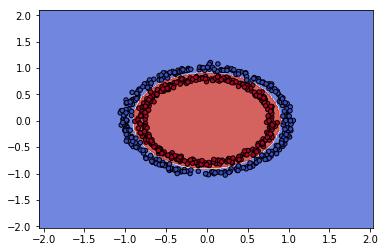

In [22]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = svg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


clf = svg.train(X_train, y_train)

fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svg, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.show()